In [2]:
%matplotlib widget

import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
import c3d
import sys

sys.path.append('/home/schiavazza/code/hpe/')

sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import ProjectionHelper
from vicon_recordings.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_recordings.src import vis_utils, utils

In [3]:
file_path = '/home/schiavazza/data/hpe/calibtest/1/S1/camera Cal 01.c3d'

In [4]:
reader = c3d.Reader(open(file_path, 'rb'))
for i, points, analog in reader.read_frames():
    print(points.shape)
    break

(8, 5)


/home/schiavazza/.local/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [5]:
print(reader.header)

                  parameter_block: 2
                      point_count: 8
                     analog_count: 0
                      first_frame: 1
                       last_frame: 374
                          max_gap: 0
                     scale_factor: -0.009999999776482582
                       data_block: 7
                 analog_per_frame: 0
                       frame_rate: 100.0
                long_event_labels: True
                      event_block: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [6]:
print(reader.point_labels)

['cam_right                     ' 'cam_back                      '
 'cam_left                      ' '*3                            '
 '*4                            ' '*5                            '
 '*6                            ' '*7                            ']


In [6]:
low_joints_labels = [
    'P001:RASI',
    'P001:LASI',
    'P001:STRN',
    'P001:CLAV',
    'P001:RFHD',
    'P001:LFHD',
    'P001:LSHO',
    'P001:RSHO',
]
joint_ids = [i for i, l in enumerate(reader.point_labels) if l.strip() in low_joints_labels]

In [7]:
frame_list = []

for i, points, analog in reader.read_frames():
    # print('frame {}: point {}, analog {}'.format(
    #     i, points.shape, analog.shape))
    
    frame_list.append(points)

In [8]:
frame_list = np.array(frame_list)
frame_list.shape

sub_frames = frame_list[:, [joint_ids]][:, 0, :, :]

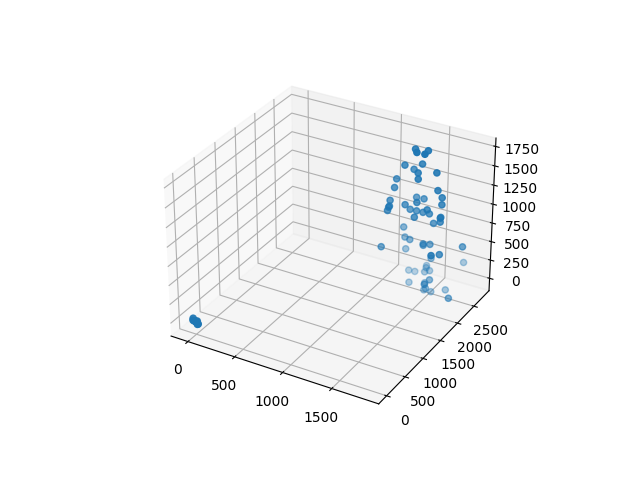

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

def update(n):
    skel._offsets3d = (frame_list[n][:, 0], frame_list[n][:, 1], frame_list[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])

skel = ax.scatter(frame_list[0][:, 0], frame_list[0][:, 1], frame_list[0][:, 2])

# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')

ani = matplotlib.animation.FuncAnimation(fig, update, frame_list.shape[0], 
                               interval=40, blit=False)

plt.show()

In [10]:
sub_frames.shape

(2863, 0, 5)

In [11]:
frame_list.shape

(2863, 93, 5)

In [12]:
for i, points, analog in reader.read_frames():
    print('frame {}: point {}, analog {}'.format(
        i, points.shape, analog.shape))

frame 1: point (93, 5), analog (0,)
frame 2: point (93, 5), analog (0,)
frame 3: point (93, 5), analog (0,)
frame 4: point (93, 5), analog (0,)
frame 5: point (93, 5), analog (0,)
frame 6: point (93, 5), analog (0,)
frame 7: point (93, 5), analog (0,)
frame 8: point (93, 5), analog (0,)
frame 9: point (93, 5), analog (0,)
frame 10: point (93, 5), analog (0,)
frame 11: point (93, 5), analog (0,)
frame 12: point (93, 5), analog (0,)
frame 13: point (93, 5), analog (0,)
frame 14: point (93, 5), analog (0,)
frame 15: point (93, 5), analog (0,)
frame 16: point (93, 5), analog (0,)
frame 17: point (93, 5), analog (0,)
frame 18: point (93, 5), analog (0,)
frame 19: point (93, 5), analog (0,)
frame 20: point (93, 5), analog (0,)
frame 21: point (93, 5), analog (0,)
frame 22: point (93, 5), analog (0,)
frame 23: point (93, 5), analog (0,)
frame 24: point (93, 5), analog (0,)
frame 25: point (93, 5), analog (0,)
frame 26: point (93, 5), analog (0,)
frame 27: point (93, 5), analog (0,)
frame 28: 

In [13]:
n_points= []

for i, points, analog in reader.read_frames():
    valid_points = points[points[:, 0] > 0.0]
    n_points.append(valid_points.shape[0])

In [14]:
helper = C3dHelper(file_path)

In [15]:
helper.calculate_frame_times()

/home/schiavazza/code/hpe/vicon_recordings/src/projection.py:48: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = scipy.stats.mode(n_points)


array([-8.2       , -8.18999651, -8.17999301, ..., 20.40999301,
       20.41999651, 20.43      ])